In [1]:
import pandas as pd
from cemba_data.plot.clustering import categorical_scatter
import matplotlib.pyplot as plt
import numpy as np

In [10]:
cell_type_meta = pd.read_csv('PATH-TO-ANALYSIS/Human/integration-with-rna/integration_results/cytosplore.human.tsv',sep='\t')
DNAm_meta = cell_type_meta[['DNAm_cluster_name','DNAm_cluster_label','DNAm_cluster_color','subclass']].drop_duplicates()


In [11]:
snmc_clust_path = 'PATH-TO-ANALYSIS/Human/Human-M1.snmC-seq.AnalysisResult.csv.gz'
df = pd.read_csv(snmc_clust_path)
# df.dropna(inplace=True)
df =df[df['SubCluster']!='Outlier']
df = pd.merge(df, DNAm_meta, how='left', left_on='SubCluster', right_on='DNAm_cluster_name')


In [12]:
deg = 17
df[['l1_umap_0','l1_umap_1']] = np.matmul(df[['l1_umap_0','l1_umap_1']].values, 
                                          np.array([[np.cos(np.radians(deg)), -np.sin(np.radians(deg))],
                                                    [np.sin(np.radians(deg)), np.cos(np.radians(deg))]]))

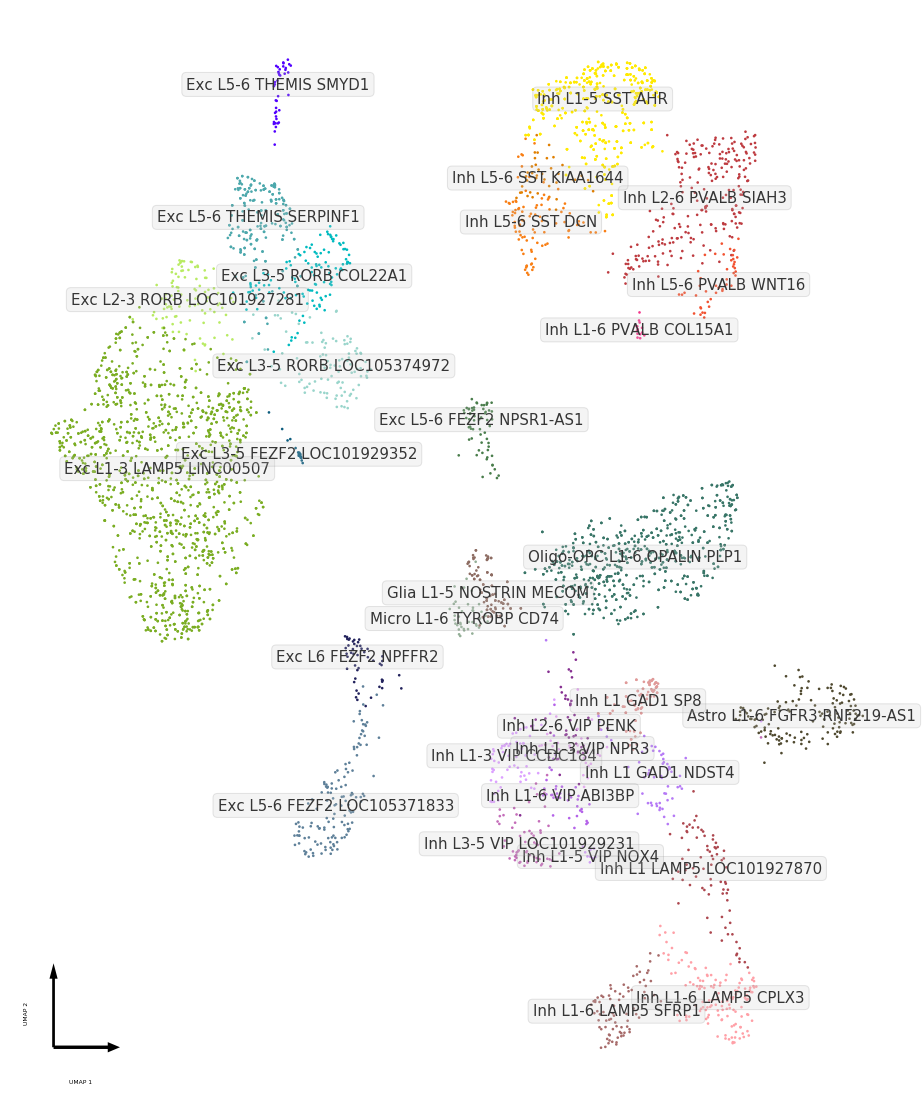

In [14]:
color_dict = { x['DNAm_cluster_label']:x['DNAm_cluster_color'] for _,x in DNAm_meta.iterrows()}
plt.figure(figsize=(16,20))
df.rename(columns={'l1_umap_0':'umap_0','l1_umap_1':'umap_1'}, inplace=True)

categorical_scatter(df, plt.gca(), coord_base='umap', hue='DNAm_cluster_label', 
                    text_anno='DNAm_cluster_label', 
                    palette=color_dict, 
                    text_anno_kws={'fontsize':15,'fontweight':'normal','color':'#353535'})
plt.show()

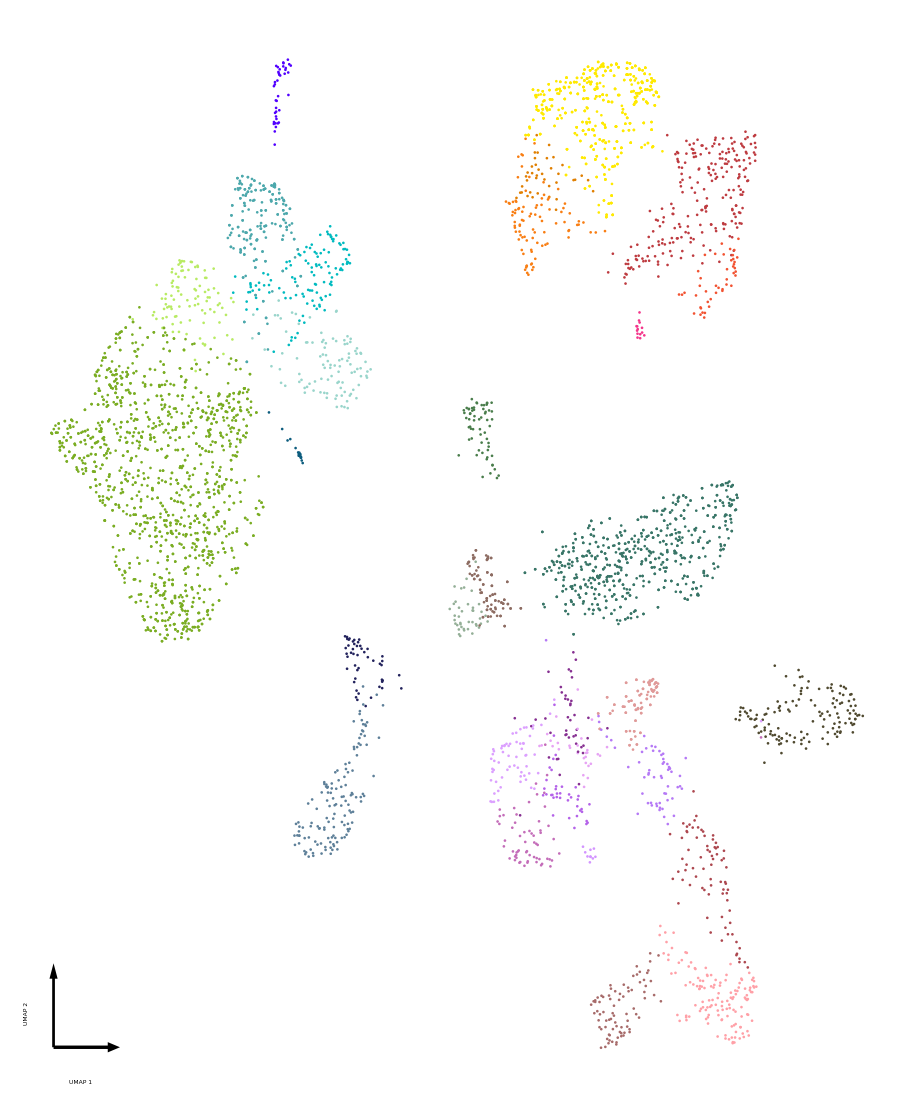

In [15]:
color_dict = { x['DNAm_cluster_label']:x['DNAm_cluster_color'] for _,x in DNAm_meta.iterrows()}
plt.figure(figsize=(16,20))
df.rename(columns={'l1_umap_0':'umap_0','l1_umap_1':'umap_1'}, inplace=True)

categorical_scatter(df, plt.gca(), coord_base='umap', hue='DNAm_cluster_label', palette=color_dict)
plt.show()